In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
columns_name = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("datasets/u.data", sep="\t", names=columns_name)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv("datasets/Movie_Id_Titles")

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df = pd.merge(df, movie_titles, on="item_id")

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [8]:
df.groupby("title")["rating"].mean().sort_values(ascending=False)

title
They Made Me a Criminal (1939)                  5.0
Marlene Dietrich: Shadow and Light (1996)       5.0
Saint of Fort Washington, The (1993)            5.0
Someone Else's America (1995)                   5.0
Star Kid (1997)                                 5.0
                                               ... 
Eye of Vichy, The (Oeil de Vichy, L') (1993)    1.0
King of New York (1990)                         1.0
Touki Bouki (Journey of the Hyena) (1973)       1.0
Bloody Child, The (1996)                        1.0
Crude Oasis, The (1995)                         1.0
Name: rating, Length: 1664, dtype: float64

In [11]:
raitings_df = pd.DataFrame(df.groupby("title")["rating"].mean())

In [12]:
raitings_df.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [13]:
raitings_df["reviews"] = pd.DataFrame(df.groupby("title")["rating"].count())

In [14]:
raitings_df.head()

,rating,reviews
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='reviews'>

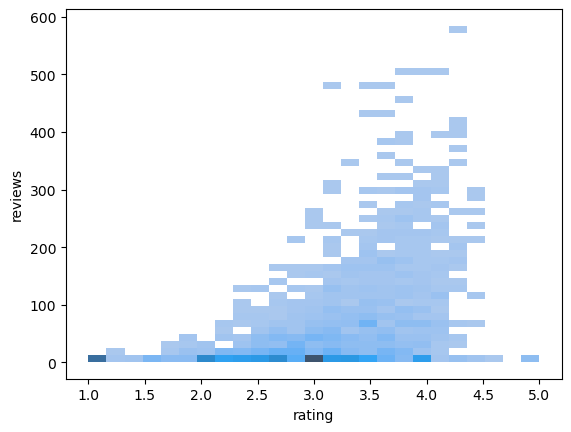

In [15]:
sns.histplot(raitings_df, x="rating", y="reviews")

(array([1.125e+03, 2.530e+02, 1.360e+02, 6.900e+01, 3.700e+01, 2.400e+01,
        8.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.3, 117.6, 175.9, 234.2, 292.5, 350.8, 409.1, 467.4,
        525.7, 584. ]),
 <BarContainer object of 10 artists>)

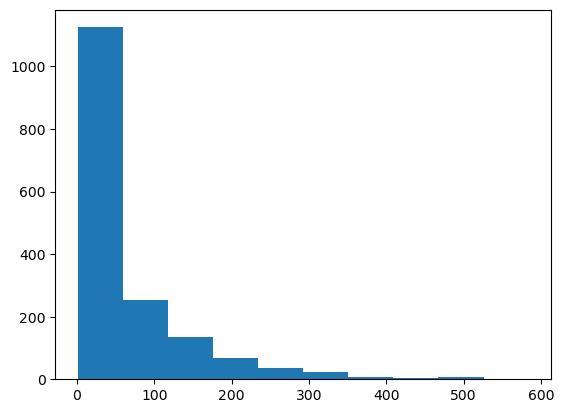

In [18]:
plt.hist(x=raitings_df["reviews"])

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


In [20]:
moviemat = df.pivot_table(values="rating", index="user_id", columns="title")

In [21]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
raitings_df.sort_values("reviews", ascending=False).head(5)

,rating,reviews
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [37]:
liar_liar_rating = moviemat["Liar Liar (1997)"]
starwar_raiting = moviemat["Star Wars (1977)"]
starwar_raiting.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [38]:
similare_to_startwars = moviemat.corrwith(starwar_raiting)

/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.

In [45]:
similare_to_startwars.sort_values(ascending=False)
similare_to_startwars.dropna(inplace=True)

In [48]:
# similare_to_startwars = similare_to_startwars.join(raitings_df["reviews"])

In [50]:
corr_startwars = pd.DataFrame(similare_to_startwars, columns=["Corrlation"])

In [ ]:
corr_startwars.join(raitings_df["reviews"])

In [61]:
corr_startwars[corr_startwars["reviews"] > 100].sort_values(
    "Corrlation", ascending=False
).head(10)

,Corrlation,reviews
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [63]:
liar_liar_rating.dropna(inplace=True)

In [64]:
liar_liar_rating

user_id
2      1.0
3      2.0
4      5.0
6      2.0
7      1.0
      ... 
927    5.0
936    3.0
937    1.0
940    4.0
941    4.0
Name: Liar Liar (1997), Length: 485, dtype: float64

In [66]:
corr_liar = moviemat.corrwith(liar_liar_rating)

/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/mahdijafari/Desktop/machine_learning/envs/ml_learning/lib/python3.12/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  

In [67]:
corr_liar

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [68]:
corr_liar.dropna(inplace=True)

In [69]:
corr_liar

title
'Til There Was You (1997)                0.118913
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
2 Days in the Valley (1996)              0.040739
                                           ...   
Young Guns (1988)                        0.410988
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Length: 1375, dtype: float64

In [71]:
correlate_lialiar_df = pd.DataFrame(corr_liar, columns=["correlation"])

In [76]:
correlate_lialiar_df = correlate_lialiar_df.join(raitings_df["reviews"])

In [80]:
correlate_lialiar_df[correlate_lialiar_df["reviews"] > 100].sort_values(
    "correlation", ascending=False
).head(10)

,correlation,reviews
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
